## Equations

### EPS
$
\begin{align}
\textit{Earnings Per Share} & = \frac{\textit{Earnings}}{\textit{Market Value Per Share}} \\
\textit{EPS} & = \frac{\textit{Earnings}}{\textit{Share Price}}
\end{align}
$

### P/E Ratio
$
\begin{align}
\textit{Price/Earnings Ratio} & = \frac{\textit{Market Value Per Share}}{\textit{Earnings Per Share}} \\
\textit{P/E} & = \frac{\textit{Share Price}}{\textit{EPS}}
\end{align}
$

IPO parameters:
- `n_shares` $ \text{number of shares} $
- `price` $ \text{price per share} $

In [58]:
mktcap = 10_000_000
earnings = 1_000_000

import pandas as pd
df = pd.DataFrame.from_records([], columns=("mktcap","n_shares","price","earnings"))
constdict = dict(mktcap=mktcap, earnings=earnings)
prices = [1, 37.50, 100, 1000]
for price in prices:
    data = {**constdict, 'price': price, 'n_shares': mktcap // price}
    data['eps'] = data['earnings'] / data['n_shares']
    data['pe'] = data['price'] / data['eps']
    df = df.append(data, ignore_index=True)
df

,mktcap,n_shares,price,earnings,eps,pe
0,10000000.0,10000000.0,1.0,1000000.0,0.100000,10.000000
1,10000000.0,266666.0,37.5,1000000.0,3.750009,9.999975
2,10000000.0,100000.0,100.0,1000000.0,10.000000,10.000000
3,10000000.0,10000.0,1000.0,1000000.0,100.000000,10.000000


### Observation 1
EPS is not useful for comparing the performance of different securities because it is sensitive to ``n_shares`` and ``price``.

[Text(0, 0, '10,000,000'),
 Text(0, 0, '266,666'),
 Text(0, 0, '100,000'),
 Text(0, 0, '10,000')]

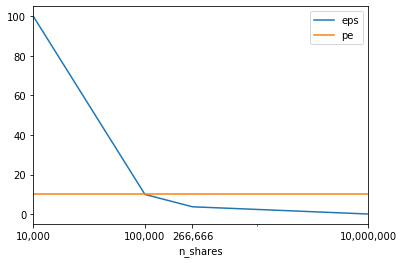

In [97]:
%matplotlib inline
xcol='n_shares'
ax = df[[xcol, 'eps', 'pe']].plot(
    x=xcol, y=['eps','pe'], logx='sym', xticks=df[xcol], use_index=True) #, table=True)
ax.set_xticklabels(df[xcol].apply(lambda x: "{:,.0f}".format(x)))

[Text(0, 0, '1.0'),
 Text(0, 0, '37.5'),
 Text(0, 0, '100.0'),
 Text(0, 0, '1,000.0')]

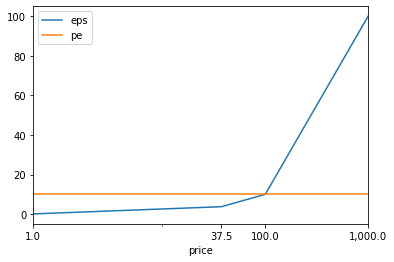

In [100]:
xcol='price'
ax = df[[xcol, 'eps', 'pe']].plot(
    x=xcol, y=['eps','pe'], logx='sym', xticks=df[xcol], use_index=True) #, table=True)
ax.set_xticklabels(df[xcol].apply(lambda x: "{:,.1f}".format(x)))

[Text(0, 0, '0.1'), Text(0, 0, '3.8'), Text(0, 0, '10.0'), Text(0, 0, '100.0')]

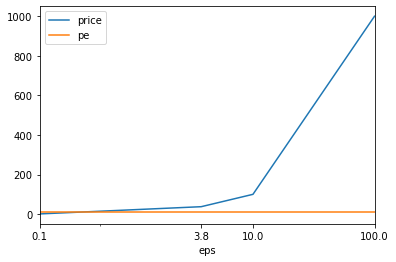

In [107]:
xcol='eps'
ax = df[[xcol, 'price', 'pe']].plot(
    x=xcol, y=['price','pe'], logx='sym', xticks=df[xcol], use_index=True) #, table=True)
ax.set_xticklabels(df[xcol].apply(lambda x: "{:,.1f}".format(x)))

### Observation 2
- For a higher EPS, set a higher initial price

## P/E Ratio further study
$
\begin{align}
\textit{P/E} & = \frac{\textit{Share Price}}{\frac{\textit{Earnings}}{\textit{Share Price}}} \\
\textit{P/E} & = \frac{\textit{Share Price}}{1} * \frac{\textit{Share Price}}{\textit{Earnings}} \\
\textit{P/E} & = \frac{\textit{Share Price}^2}{\textit{Earnings}}
\end{align}
$

In [116]:
import sympy as sp
eps = sp.var("EPS")
earnings = sp.var("earnings")
mktcap = sp.var("mktcap")
price = sp.var("price")
pe = sp.var("PE")

In [118]:
eps_eq = sp.Eq(eps, earnings / price)
eps_eq

Eq(EPS, earnings/price)

In [121]:
pe_eq = sp.Eq(pe, price / eps)
pe_eq

Eq(PE, price/EPS)

In [145]:
pe_eq_full = pe_eq.subs({eps: eps_eq.rhs})
pe_eq_full

Eq(PE, price**2/earnings)

In [146]:
from sympy.core.evaluate import evaluate
with evaluate(False):
    pe_eq_full_unsimplified = pe_eq.subs({eps: eps_eq.rhs})
pe_eq_full_unsimplified

Eq(PE, price/((earnings/price)))

In [135]:
pe_eq_full.lhs, pe_eq_full.rhs

(PE, price**2/earnings)

In [136]:
str(pe_eq_full)

'Eq(PE, price**2/earnings)'

In [137]:
pe_eq_full.rhs

price**2/earnings